## Mental health vs Education level, 2007 ~ 2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [2]:
%load_ext sql

In [3]:
%sql sqlite:///brfss.sqlite

'Connected: @brfss.sqlite'

In [4]:
%%sql

SELECT name
FROM sqlite_master 
WHERE type ='table' AND name NOT LIKE 'sqlite_%'
order by name asc

 * sqlite:///brfss.sqlite
Done.


name
BRFSS_2007
BRFSS_2008
BRFSS_2009
BRFSS_2010
BRFSS_2011
BRFSS_2012
BRFSS_2013
BRFSS_2014
BRFSS_2015
BRFSS_2016


In [5]:
%%sql

select * from
(select [x.state] as state,
count(case when EDUCA=1 then 1 end) level_1,
count(case when EDUCA=2 then 1 end) level_2,
count(case when EDUCA=3 then 1 end) level_3,
count(case when EDUCA=4 then 1 end) level_4,
count(case when EDUCA=5 then 1 end) level_5,
count(case when EDUCA=6 then 1 end) level_6,
count(case when EDUCA=9 then 1 end) level_9
from BRFSS_2007 
where MENTHLTH between 1 and 30 and state <=72
group by state) t1
inner join
(select [x.state] as state,
count(case when EDUCA=1 then 1 end) total_1,
count(case when EDUCA=2 then 1 end) total_2,
count(case when EDUCA=3 then 1 end) total_3,
count(case when EDUCA=4 then 1 end) total_4,
count(case when EDUCA=5 then 1 end) total_5,
count(case when EDUCA=6 then 1 end) total_6,
count(case when EDUCA=9 then 1 end) total_9
from BRFSS_2007 
where MENTHLTH is not null and state <= 72
group by state) t2
on t1.state=t2.state

 * sqlite:///brfss.sqlite
Done.


state,level_1,level_2,level_3,level_4,level_5,level_6,level_9,state_1,total_1,total_2,total_3,total_4,total_5,total_6,total_9
1,5,110,320,774,622,509,2,1,15,331,873,2444,1814,1756,17
2,2,14,42,222,263,276,2,2,4,55,148,777,741,820,7
4,8,56,114,414,486,440,4,4,17,212,337,1328,1399,1423,17
5,0,73,179,622,437,468,1,5,6,221,467,2062,1388,1572,17
6,0,136,140,447,573,750,19,6,8,393,345,1113,1524,2249,59
8,1,71,194,883,1048,1604,3,8,14,256,509,2826,3103,5185,15
9,5,41,107,581,597,996,7,9,16,201,341,1883,1784,3273,25
10,0,19,80,432,360,415,0,10,2,57,221,1282,1033,1393,3
11,3,31,72,192,215,739,4,11,15,112,201,582,651,2382,14
12,33,427,1091,3546,3181,2667,22,12,138,1607,3242,13017,10723,10600,123


In [6]:
con = sqlite3.connect('brfss.sqlite')

tables = [
    'BRFSS_2007',
    'BRFSS_2008',
    'BRFSS_2009',
    'BRFSS_2010',
    'BRFSS_2011',
    'BRFSS_2012',
    'BRFSS_2013',
    'BRFSS_2014',
    'BRFSS_2015',
    'BRFSS_2016',
    'BRFSS_2017'
]

dfs = {}

for table in tables:
    
    q = '''
        select * from
        (select [x.state] as state,
        count(case when EDUCA=1 then 1 end) level_1,
        count(case when EDUCA=2 then 1 end) level_2,
        count(case when EDUCA=3 then 1 end) level_3,
        count(case when EDUCA=4 then 1 end) level_4,
        count(case when EDUCA=5 then 1 end) level_5,
        count(case when EDUCA=6 then 1 end) level_6,
        count(case when EDUCA=9 then 1 end) level_9
        from {} 
        where MENTHLTH between 1 and 30 and state <=72
        group by state) t1
        inner join
        (select [x.state] as state,
        count(case when EDUCA=1 then 1 end) total_1,
        count(case when EDUCA=2 then 1 end) total_2,
        count(case when EDUCA=3 then 1 end) total_3,
        count(case when EDUCA=4 then 1 end) total_4,
        count(case when EDUCA=5 then 1 end) total_5,
        count(case when EDUCA=6 then 1 end) total_6,
        count(case when EDUCA=9 then 1 end) total_9
        from {} 
        where MENTHLTH is not null and state <= 72
        group by state) t2
        on t1.state=t2.state
        '''.format(table, table)
    
    df = pd.read_sql(q, con)
    dfs[table] = df
    

In [7]:
fips = pd.read_csv('states.csv')
fips_name = dict(zip(list(fips.FIPS), list(fips.Name)))

In [8]:
data = pd.DataFrame()

for key in dfs:
    df = dfs[key]
    df['state_name'] = df.iloc[:,8].map(fips_name)
    year = int(key[-4:])
    df.insert(0, 'year', year)
    data = pd.concat([data, df], ignore_index=True)
    

In [9]:
data.columns.values[1] = "FIPS"
data.drop(data.columns[9], axis=1, inplace=True)
data.head()

,year,FIPS,level_1,level_2,level_3,level_4,level_5,level_6,level_9,total_1,total_2,total_3,total_4,total_5,total_6,total_9,state_name
0,2007,1,5,110,320,774,622,509,2,15,331,873,2444,1814,1756,17,Alabama
1,2007,2,2,14,42,222,263,276,2,4,55,148,777,741,820,7,Alaska
2,2007,4,8,56,114,414,486,440,4,17,212,337,1328,1399,1423,17,Arizona
3,2007,5,0,73,179,622,437,468,1,6,221,467,2062,1388,1572,17,Arkansas
4,2007,6,0,136,140,447,573,750,19,8,393,345,1113,1524,2249,59,California


In [10]:
data.tail()

,year,FIPS,level_1,level_2,level_3,level_4,level_5,level_6,level_9,total_1,total_2,total_3,total_4,total_5,total_6,total_9,state_name
578,2017,54,4,67,174,663,514,443,0,4,170,432,1937,1409,1508,12,West Virginia
579,2017,55,1,13,81,546,616,693,6,7,58,205,1708,1717,2091,20,Wisconsin
580,2017,56,2,10,44,346,466,408,3,5,41,152,1293,1466,1498,8,Wyoming
581,2017,66,0,6,46,182,127,134,2,0,26,109,536,369,465,3,Guam
582,2017,72,7,82,75,250,293,281,4,25,482,351,1182,1110,1316,18,Puerto Rico


In [11]:
all_states = data.groupby(['year']).sum().drop('FIPS', axis=1)

In [12]:
all_states

,level_1,level_2,level_3,level_4,level_5,level_6,level_9,total_1,total_2,total_3,total_4,total_5,total_6,total_9
year,,,,,,,,,,,,,,
2007,232,4140,9843,38834,36747,41041,224,853,14855,28686,130773,112195,139776,1056
2008,243,4024,9246,37210,35980,40349,211,787,13678,26247,124107,108947,137009,990
2009,172,4065,9118,37718,37449,41233,308,634,13766,26213,128318,115097,144583,1270
2010,177,4566,10146,40169,38551,43066,266,597,14529,27844,133843,119057,151798,1298
2011,174,4656,11094,45281,45060,49645,382,654,15214,30555,149387,136060,172668,1580
2012,182,4246,10519,42925,43011,47225,302,635,13549,28167,139501,128404,163510,1476
2013,213,4060,10049,42179,43620,48042,360,675,13375,28082,142952,134242,170173,1747
2014,166,3684,8710,38248,39834,46027,415,671,11863,24468,131325,125635,166972,1959
2015,195,3413,7837,36522,39293,45339,373,609,11187,22463,123227,120528,161631,1811


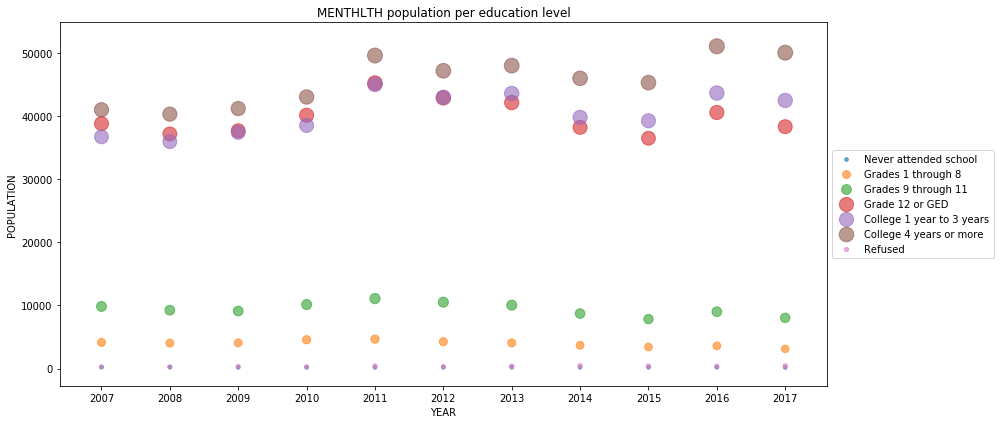

In [13]:
labels = ['Never attended school', 'Grades 1 through 8', 'Grades 9 through 11', 'Grade 12 or GED', 
          'College 1 year to 3 years', 'College 4 years or more', 'Refused']

plt.figure(figsize=(14,6))
plt.scatter(x = all_states.index, y = all_states.level_1, label='lv_1', s=all_states.level_1**0.5, alpha=.6)
plt.scatter(x = all_states.index, y = all_states.level_2, label='lv_2', s=all_states.level_2**0.5, alpha=.6)
plt.scatter(x = all_states.index, y = all_states.level_3, label='lv_3', s=all_states.level_3**0.5, alpha=.6)
plt.scatter(x = all_states.index, y = all_states.level_4, label='lv_4', s=all_states.level_4**0.5, alpha=.6)
plt.scatter(x = all_states.index, y = all_states.level_5, label='lv_5', s=all_states.level_5**0.5, alpha=.6)
plt.scatter(x = all_states.index, y = all_states.level_6, label='lv_6', s=all_states.level_6**0.5, alpha=.6)
plt.scatter(x = all_states.index, y = all_states.level_9, label='lv_9', s=all_states.level_9**0.5, alpha=.6)

plt.xticks(all_states.index)
plt.xlabel('YEAR')
plt.ylabel('POPULATION')
plt.title('MENTHLTH population per education level')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=labels)
plt.tight_layout()

In [14]:
all_states['total_yes'] = all_states[['level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6', 'level_9']].sum(axis=1)
all_states['total'] = all_states[['total_1', 'total_2', 'total_3', 'total_4', 'total_5', 'total_6', 'total_9']].sum(axis=1)

all_states['p1'] = all_states.level_1/all_states.total_yes
all_states['p2'] = all_states.level_2/all_states.total_yes
all_states['p3'] = all_states.level_3/all_states.total_yes
all_states['p4'] = all_states.level_4/all_states.total_yes
all_states['p5'] = all_states.level_5/all_states.total_yes
all_states['p6'] = all_states.level_6/all_states.total_yes
all_states['p9'] = all_states.level_9/all_states.total_yes

In [15]:
all_states.columns

Index(['level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6',
       'level_9', 'total_1', 'total_2', 'total_3', 'total_4', 'total_5',
       'total_6', 'total_9', 'total_yes', 'total', 'p1', 'p2', 'p3', 'p4',
       'p5', 'p6', 'p9'],
      dtype='object')

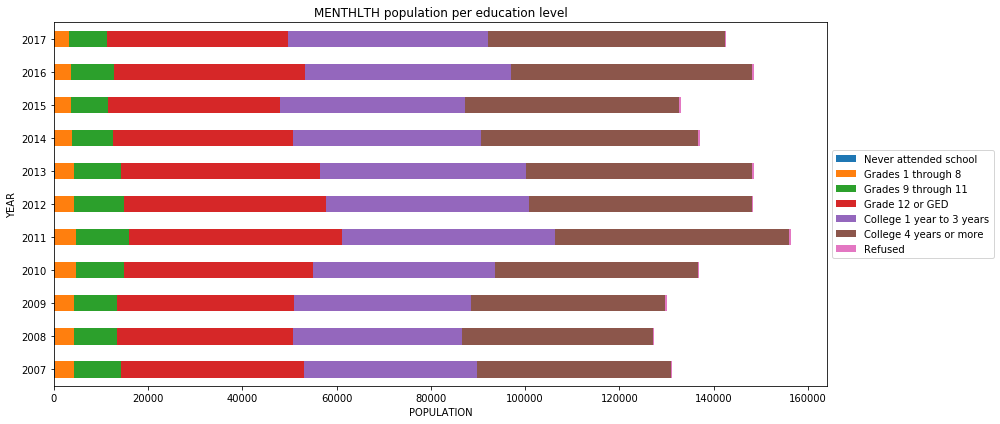

In [16]:
tmp = all_states[['level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6', 'level_9']]
tmp.plot(kind='barh', stacked=True, figsize=(14,6))

plt.ylabel('YEAR')
plt.xlabel('POPULATION')
plt.title('MENTHLTH population per education level')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=labels)
plt.tight_layout()

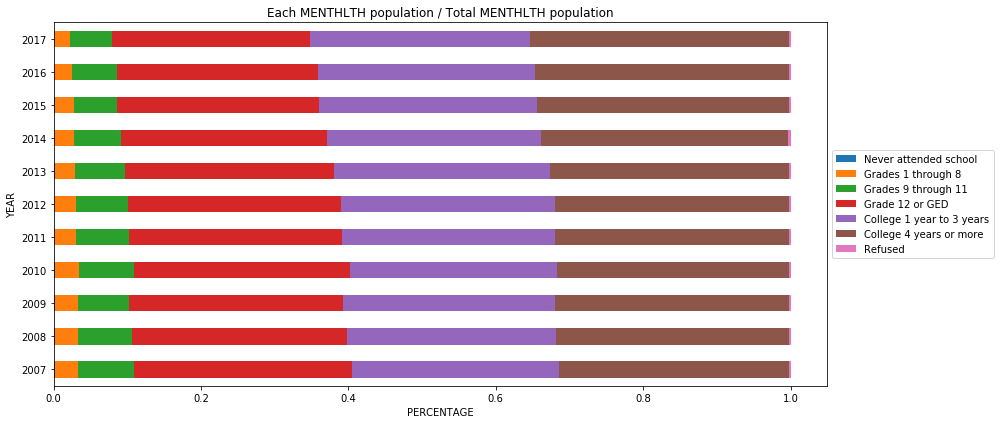

In [17]:
all_states[['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p9']].plot(kind='barh', stacked=True, figsize=(14,6))
plt.ylabel('YEAR')
plt.xlabel('PERCENTAGE')
plt.title('Each MENTHLTH population / Total MENTHLTH population')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=labels)
plt.tight_layout()

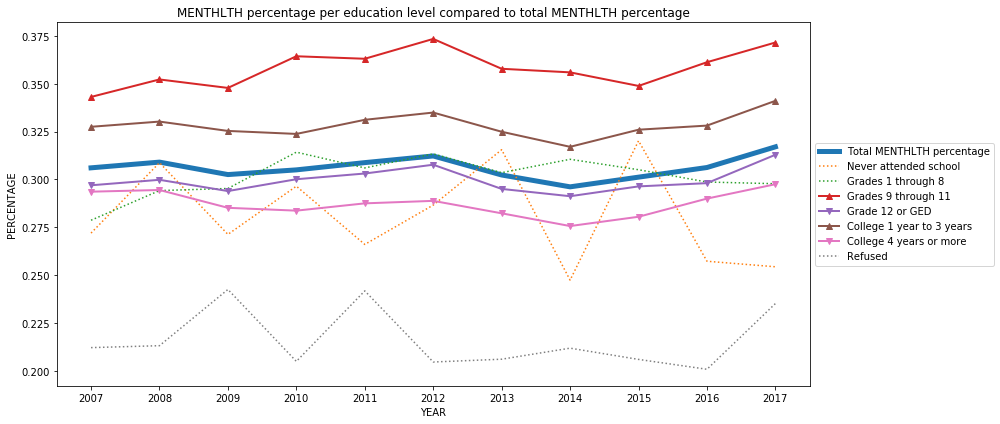

In [18]:
plt.figure(figsize=(14, 6))

plt.title('MENTHLTH percentage per education level compared to total MENTHLTH percentage')
plt.plot(all_states.index, all_states.total_yes/all_states.total, linewidth=5, label='Total MENTHLTH percentage')
plt.plot(all_states.index, all_states.level_1/all_states.total_1, ':', label=labels[0])
plt.plot(all_states.index, all_states.level_2/all_states.total_2, ':', label=labels[1])
plt.plot(all_states.index, all_states.level_3/all_states.total_3, '^-', linewidth=2, label=labels[2])
plt.plot(all_states.index, all_states.level_4/all_states.total_4, 'v-', linewidth=2, label=labels[3])
plt.plot(all_states.index, all_states.level_5/all_states.total_5, '^-', linewidth=2, label=labels[4])
plt.plot(all_states.index, all_states.level_6/all_states.total_6, 'v-', linewidth=2, label=labels[5])
plt.plot(all_states.index, all_states.level_9/all_states.total_9, ':', label=labels[6])

plt.xticks(all_states.index)
plt.xlabel('YEAR')
plt.ylabel('PERCENTAGE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

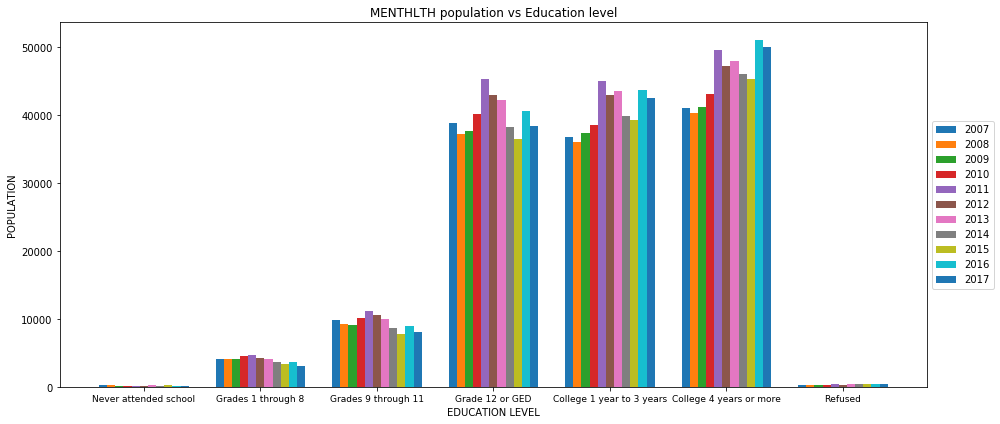

In [19]:
fig, ax = plt.subplots(figsize=(14,6))

index = np.arange(0, 7)
bar_width = 0.07

label = 2007
for i in range(11):
    delta = i * bar_width
    ax.bar(index+delta, all_states.iloc[i,[0,1,2,3,4,5,6]], bar_width, label=label+i)

ax.set_ylabel('POPULATION')
ax.set_xlabel('EDUCATION LEVEL')
ax.set_title('MENTHLTH population vs Education level')
ax.set_xticks(index + 5*bar_width)
ax.set_xticklabels(labels, size=9)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

In [20]:
data['total_yes'] = data[['level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6', 'level_9']].sum(axis=1)
data['total'] = data[['total_1', 'total_2', 'total_3', 'total_4', 'total_5', 'total_6', 'total_9']].sum(axis=1)

data['p1'] = data.level_1/data.total_yes
data['p2'] = data.level_2/data.total_yes
data['p3'] = data.level_3/data.total_yes
data['p4'] = data.level_4/data.total_yes
data['p5'] = data.level_5/data.total_yes
data['p6'] = data.level_6/data.total_yes
data['p9'] = data.level_9/data.total_yes
data['p'] = data.total_yes/data.total

In [21]:
data.head()

,year,FIPS,level_1,level_2,level_3,level_4,level_5,level_6,level_9,total_1,...,total_yes,total,p1,p2,p3,p4,p5,p6,p9,p
0,2007,1,5,110,320,774,622,509,2,15,...,2342,7250,0.002135,0.046968,0.136635,0.330487,0.265585,0.217336,0.000854,0.323034
1,2007,2,2,14,42,222,263,276,2,4,...,821,2552,0.002436,0.017052,0.051157,0.270402,0.320341,0.336175,0.002436,0.321708
2,2007,4,8,56,114,414,486,440,4,17,...,1522,4733,0.005256,0.036794,0.074901,0.272011,0.319317,0.289093,0.002628,0.321572
3,2007,5,0,73,179,622,437,468,1,6,...,1780,5733,0.000000,0.041011,0.100562,0.349438,0.245506,0.262921,0.000562,0.310483
4,2007,6,0,136,140,447,573,750,19,8,...,2065,5691,0.000000,0.065860,0.067797,0.216465,0.277482,0.363196,0.009201,0.362854


In [22]:
data.to_csv("data2.csv", index=False)